<a href="https://colab.research.google.com/github/paularamo/awesome-fiftyone/blob/main/quickstart_coffee_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FiftyOne with My Coffee-Beans Dataset
Hello there! This notebook provides a brief walkthrough of [FiftyOne](https://voxel51.com/docs/fiftyone), highlighting features that will help you build better datasets and computer vision models.

We'll cover the following concepts:

- Loading your own dataset [into FiftyOne](https://voxel51.com/docs/fiftyone/user_guide/dataset_creation/index.html). You can replace [my Coffee-Beans Dataset](https://huggingface.co/datasets/pjramg/colombian_coffee) by the one of your preference.
- Using FiftyOne [in a notebook](https://voxel51.com/docs/fiftyone/environments/index.html#notebooks)
- Using [views](https://voxel51.com/docs/fiftyone/user_guide/using_views.html) and [the App](https://voxel51.com/docs/fiftyone/user_guide/app.html) to explore different aspects of your dataset
- Running

## Install FiftyOne


In [ ]:
!pip install fiftyone

## Load a dataset

Let's get started by importing the FiftyOne library, and the utils we need for a COCO format dataset, depending of the dataset format you should change that option. [Supported Formats](https://docs.voxel51.com/user_guide/dataset_creation/datasets.html#supported-formats)

In [ ]:
import fiftyone.utils.huggingface as fouh

import fiftyone as fo

from fiftyone.utils.coco import COCODetectionDatasetImporter

Previously, I download my dataset from HuggingFace Hub Datasets, and them I can work with it locally. Here more information about [loading dataset into FiftyOne](https://docs.voxel51.com/user_guide/dataset_creation/index.html)

In [ ]:
dataset = fo.Dataset.from_dir(
    dataset_type=fo.types.COCODetectionDataset,
    dataset_dir="./colombian_coffee",
    data_path="images/default",
    labels_path="annotations/instances_default.json",
    label_types="segmentations",
    label_field="categories",
    name="coffee",
    include_id=True,
    overwrite=True
)

 100% |███████████████| 1593/1593 [4.4s elapsed, 0s remaining, 488.3 samples/s]       


Dataset information

In [ ]:
dataset

Name:        coffee
Media type:  image
Num samples: 1593
Persistent:  False
Tags:        []
Sample fields:
    id:                       fiftyone.core.fields.ObjectIdField
    filepath:                 fiftyone.core.fields.StringField
    tags:                     fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:                 fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    created_at:               fiftyone.core.fields.DateTimeField
    last_modified_at:         fiftyone.core.fields.DateTimeField
    categories_coco_id:       fiftyone.core.fields.IntField
    categories_segmentations: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)

In [ ]:
dataset.last()

<Sample: {
    'id': '6760a7fdb045db4bdf5e0283',
    'media_type': 'image',
    'filepath': '/Users/paularamos/Documents/fiftyone_getstarted/fiftyone-examples/examples/colombian_coffee/images/default/lin_ln_20150813_093518_im_62.jpg',
    'tags': [],
    'metadata': <ImageMetadata: {
        'size_bytes': None,
        'mime_type': None,
        'width': 1920,
        'height': 1080,
        'num_channels': None,
    }>,
    'created_at': datetime.datetime(2024, 12, 16, 22, 21, 49, 894000),
    'last_modified_at': datetime.datetime(2024, 12, 16, 22, 21, 49, 894000),
    'categories_coco_id': 1593,
    'categories_segmentations': None,
}>

Now let's launch the [FiftyOne App](https://voxel51.com/docs/fiftyone/user_guide/app.html) so we can explore the dataset visually. Right away you will see that because we are in a notebook, an embedded instance of the App with our dataset loaded has been rendered in the cell's output.

The [Session](https://voxel51.com/docs/fiftyone/api/fiftyone.core.session.html#fiftyone.core.session.Session) object created below is a bi-directional connection between your Python kernel and the FiftyOne App, as we'll see later.


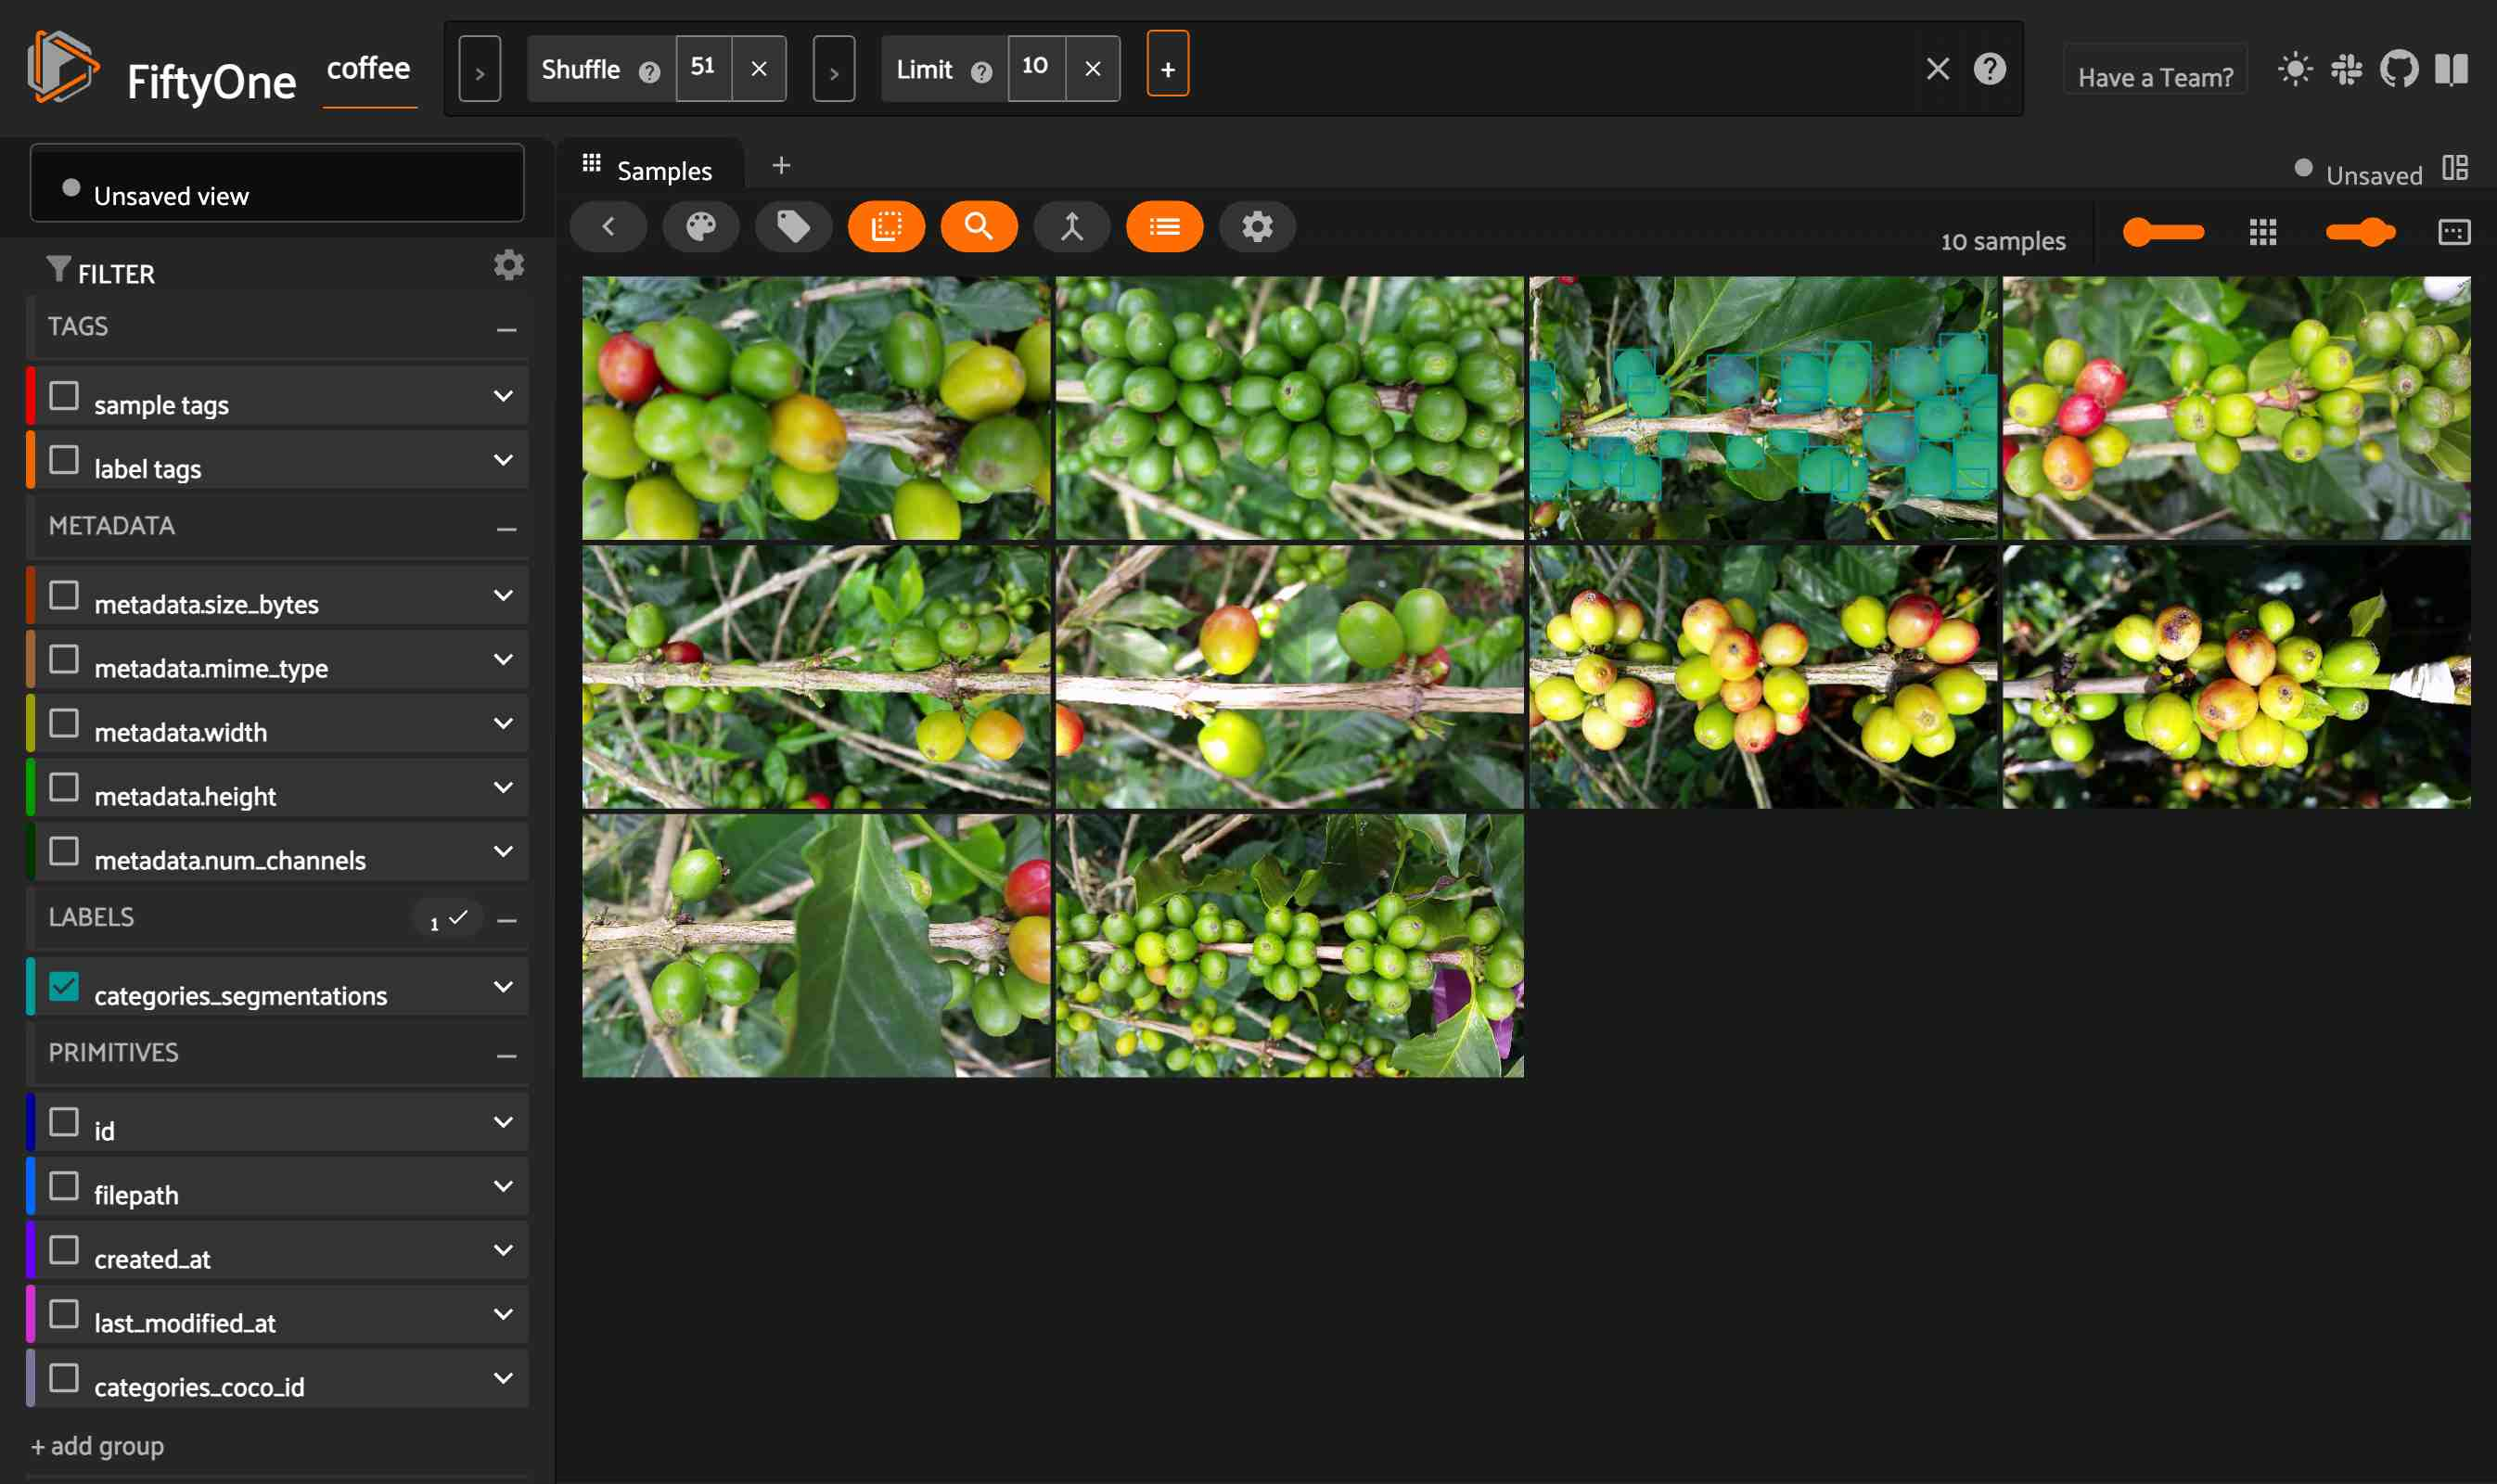

In [ ]:
session = fo.launch_app(dataset)

## Using the App

With the App, you can visualize your samples and their fields either in image grid view, or by double-clicking an image to enter an expanded sample view, where you can study individual samples in more detail.

The [view bar](https://voxel51.com/docs/fiftyone/user_guide/app.html#using-the-view-bar) allows you to search and filter your dataset to study specific samples or labels of interest.

With FiftyOne, you can seemlessly transition between the App and Python. For example, create a search using the `Shuffle() == 51` and `Limit() == 10` stages in the view bar:


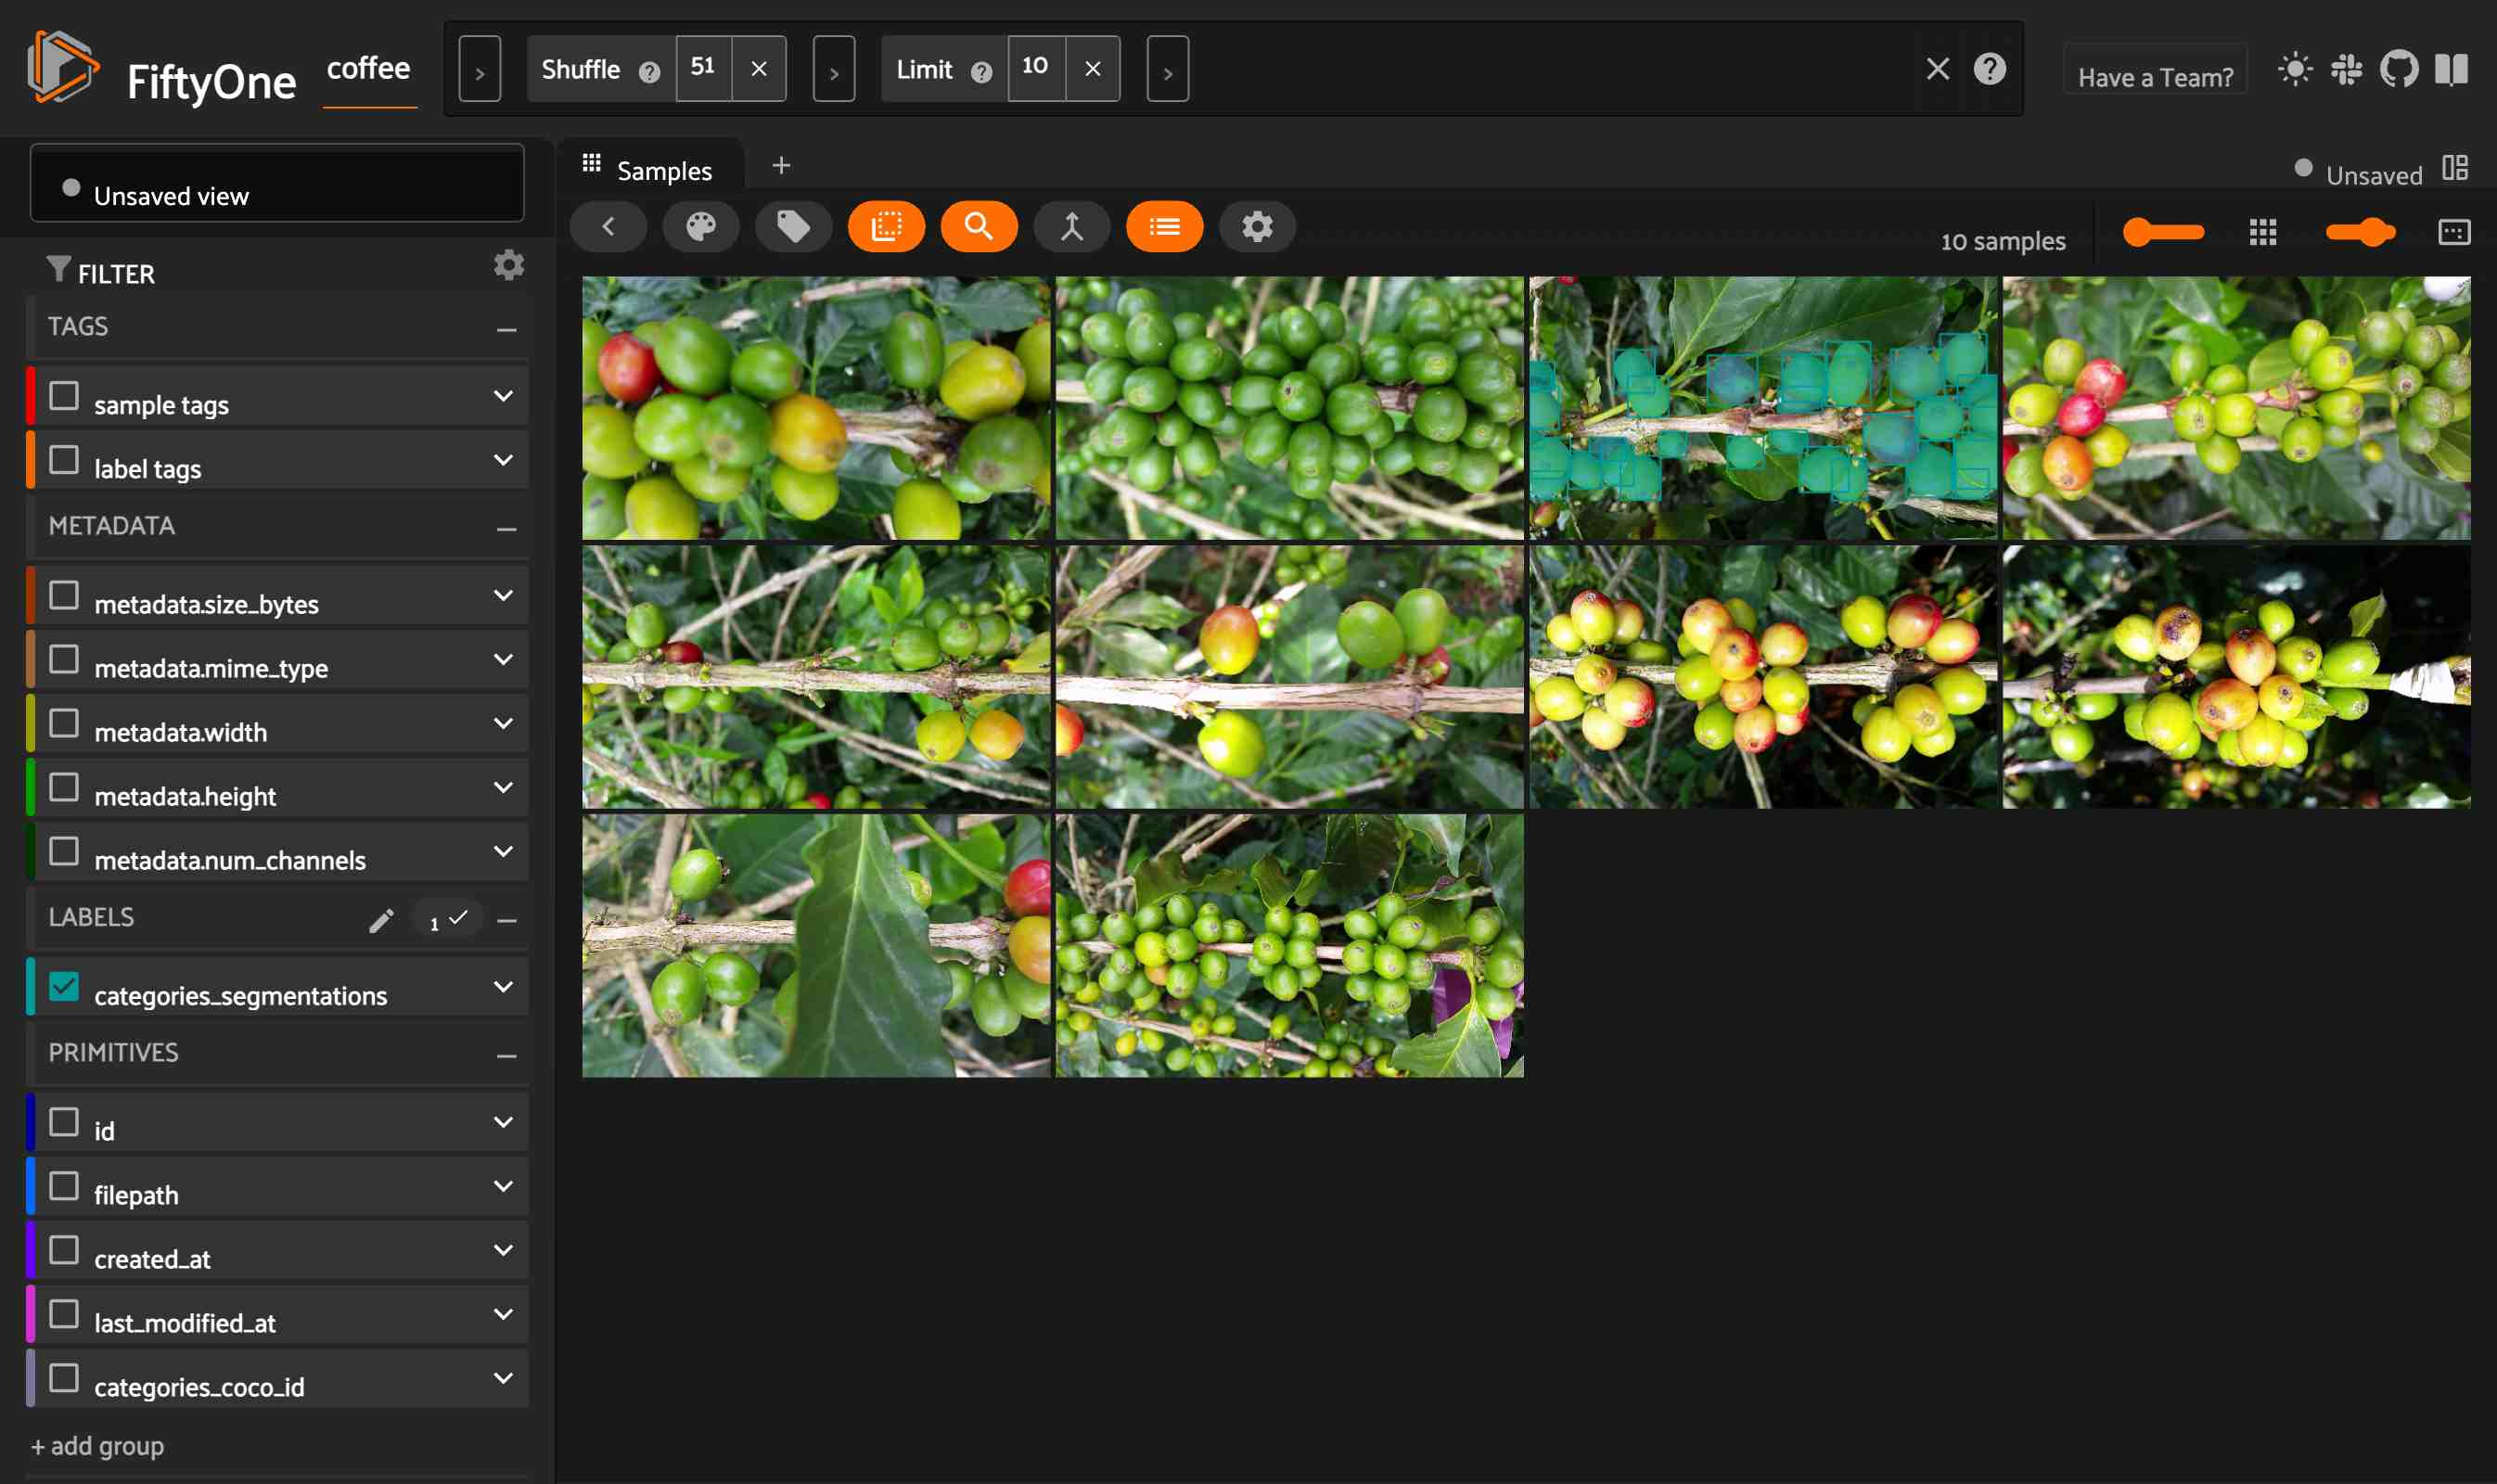

In [ ]:
session.show()

You can access the current view back in your Python shell at any time:

In [ ]:
# Access the current view in the App
print(session.view)

Dataset:     coffee
Media type:  image
Num samples: 10
Sample fields:
    id:                       fiftyone.core.fields.ObjectIdField
    filepath:                 fiftyone.core.fields.StringField
    tags:                     fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:                 fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    created_at:               fiftyone.core.fields.DateTimeField
    last_modified_at:         fiftyone.core.fields.DateTimeField
    categories_coco_id:       fiftyone.core.fields.IntField
    categories_segmentations: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
View stages:
    1. Shuffle(seed=51)
    2. Limit(limit=10)


## Indexing images by uniqueness

FiftyOne includes a `fiftyone.brain` package that provides a collection of algorithms to help you gain insight into your datasets and models. For more information, [check out the user guide](https://voxel51.com/docs/fiftyone/user_guide/brain.html).

Let's use the `compute_uniqueness()` function to index the samples in our dataset according to their visual uniqueness:

In [ ]:
import fiftyone.brain as fob

fob.compute_uniqueness(dataset)

Computing embeddings...
 100% |███████████████| 1593/1593 [25.6s elapsed, 0s remaining, 62.6 samples/s]      
Computing uniqueness...
Uniqueness computation complete


Inspecting the dataset shows that a numeric `uniqueness` field has been added to each sample, which measures its visual uniqueness with respect to the other samples in the dataset:

In [ ]:
print(dataset.select_fields("uniqueness").first())

<SampleView: {
    'id': '6760a7f9b045db4bdf5df2a4',
    'media_type': 'image',
    'filepath': '/Users/paularamos/Documents/fiftyone_getstarted/fiftyone-examples/examples/colombian_coffee/images/default/lin_ln_20150617_102755_im_01.jpg',
    'tags': [],
    'metadata': <ImageMetadata: {
        'size_bytes': None,
        'mime_type': None,
        'width': 1920,
        'height': 1080,
        'num_channels': None,
    }>,
    'created_at': datetime.datetime(2024, 12, 16, 22, 21, 45, 578000),
    'last_modified_at': datetime.datetime(2024, 12, 16, 22, 24, 57, 562000),
    'uniqueness': 0.5325209931239586,
}>


Let's visualize this information in the App by showing the most visually unique samples first:


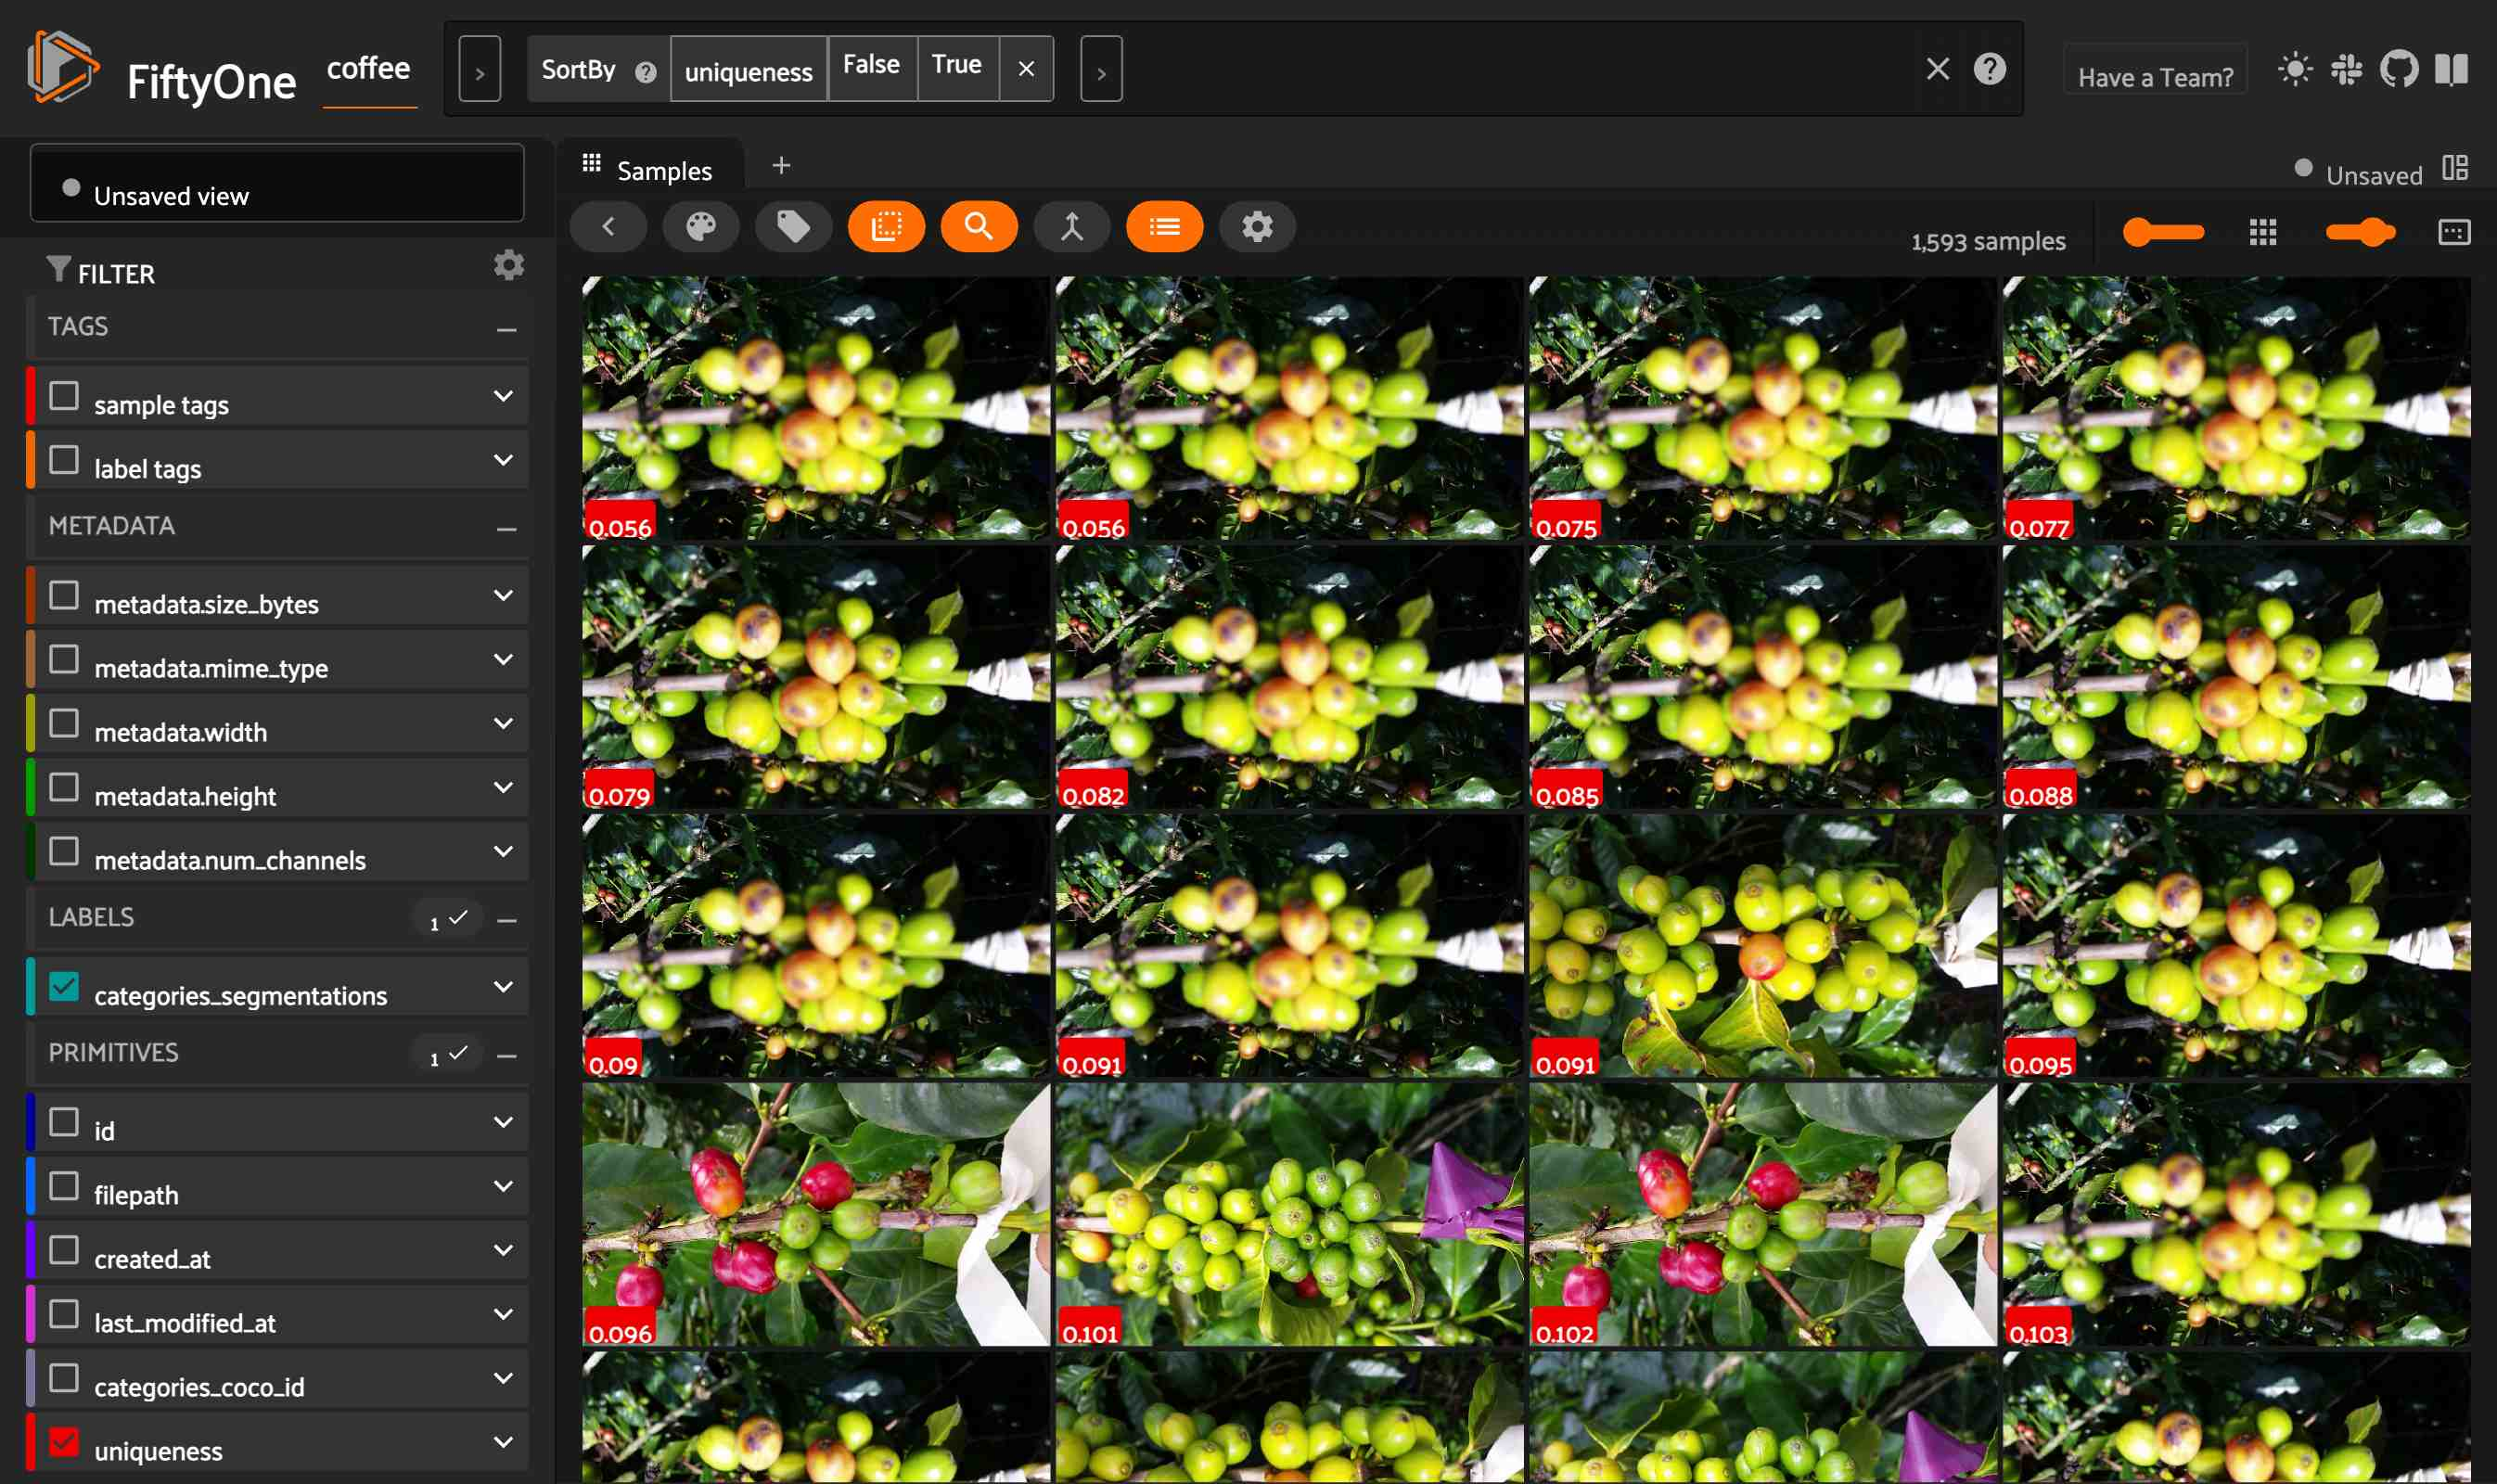

In [ ]:
# Explore most unique samples
session.view = dataset.sort_by("uniqueness", reverse=True)

Sorting by **least unique** can help us identify near duplicate samples in our dataset. This can be useful in situations where you need to send a dataset for annotation and need to select a diverse set of images.


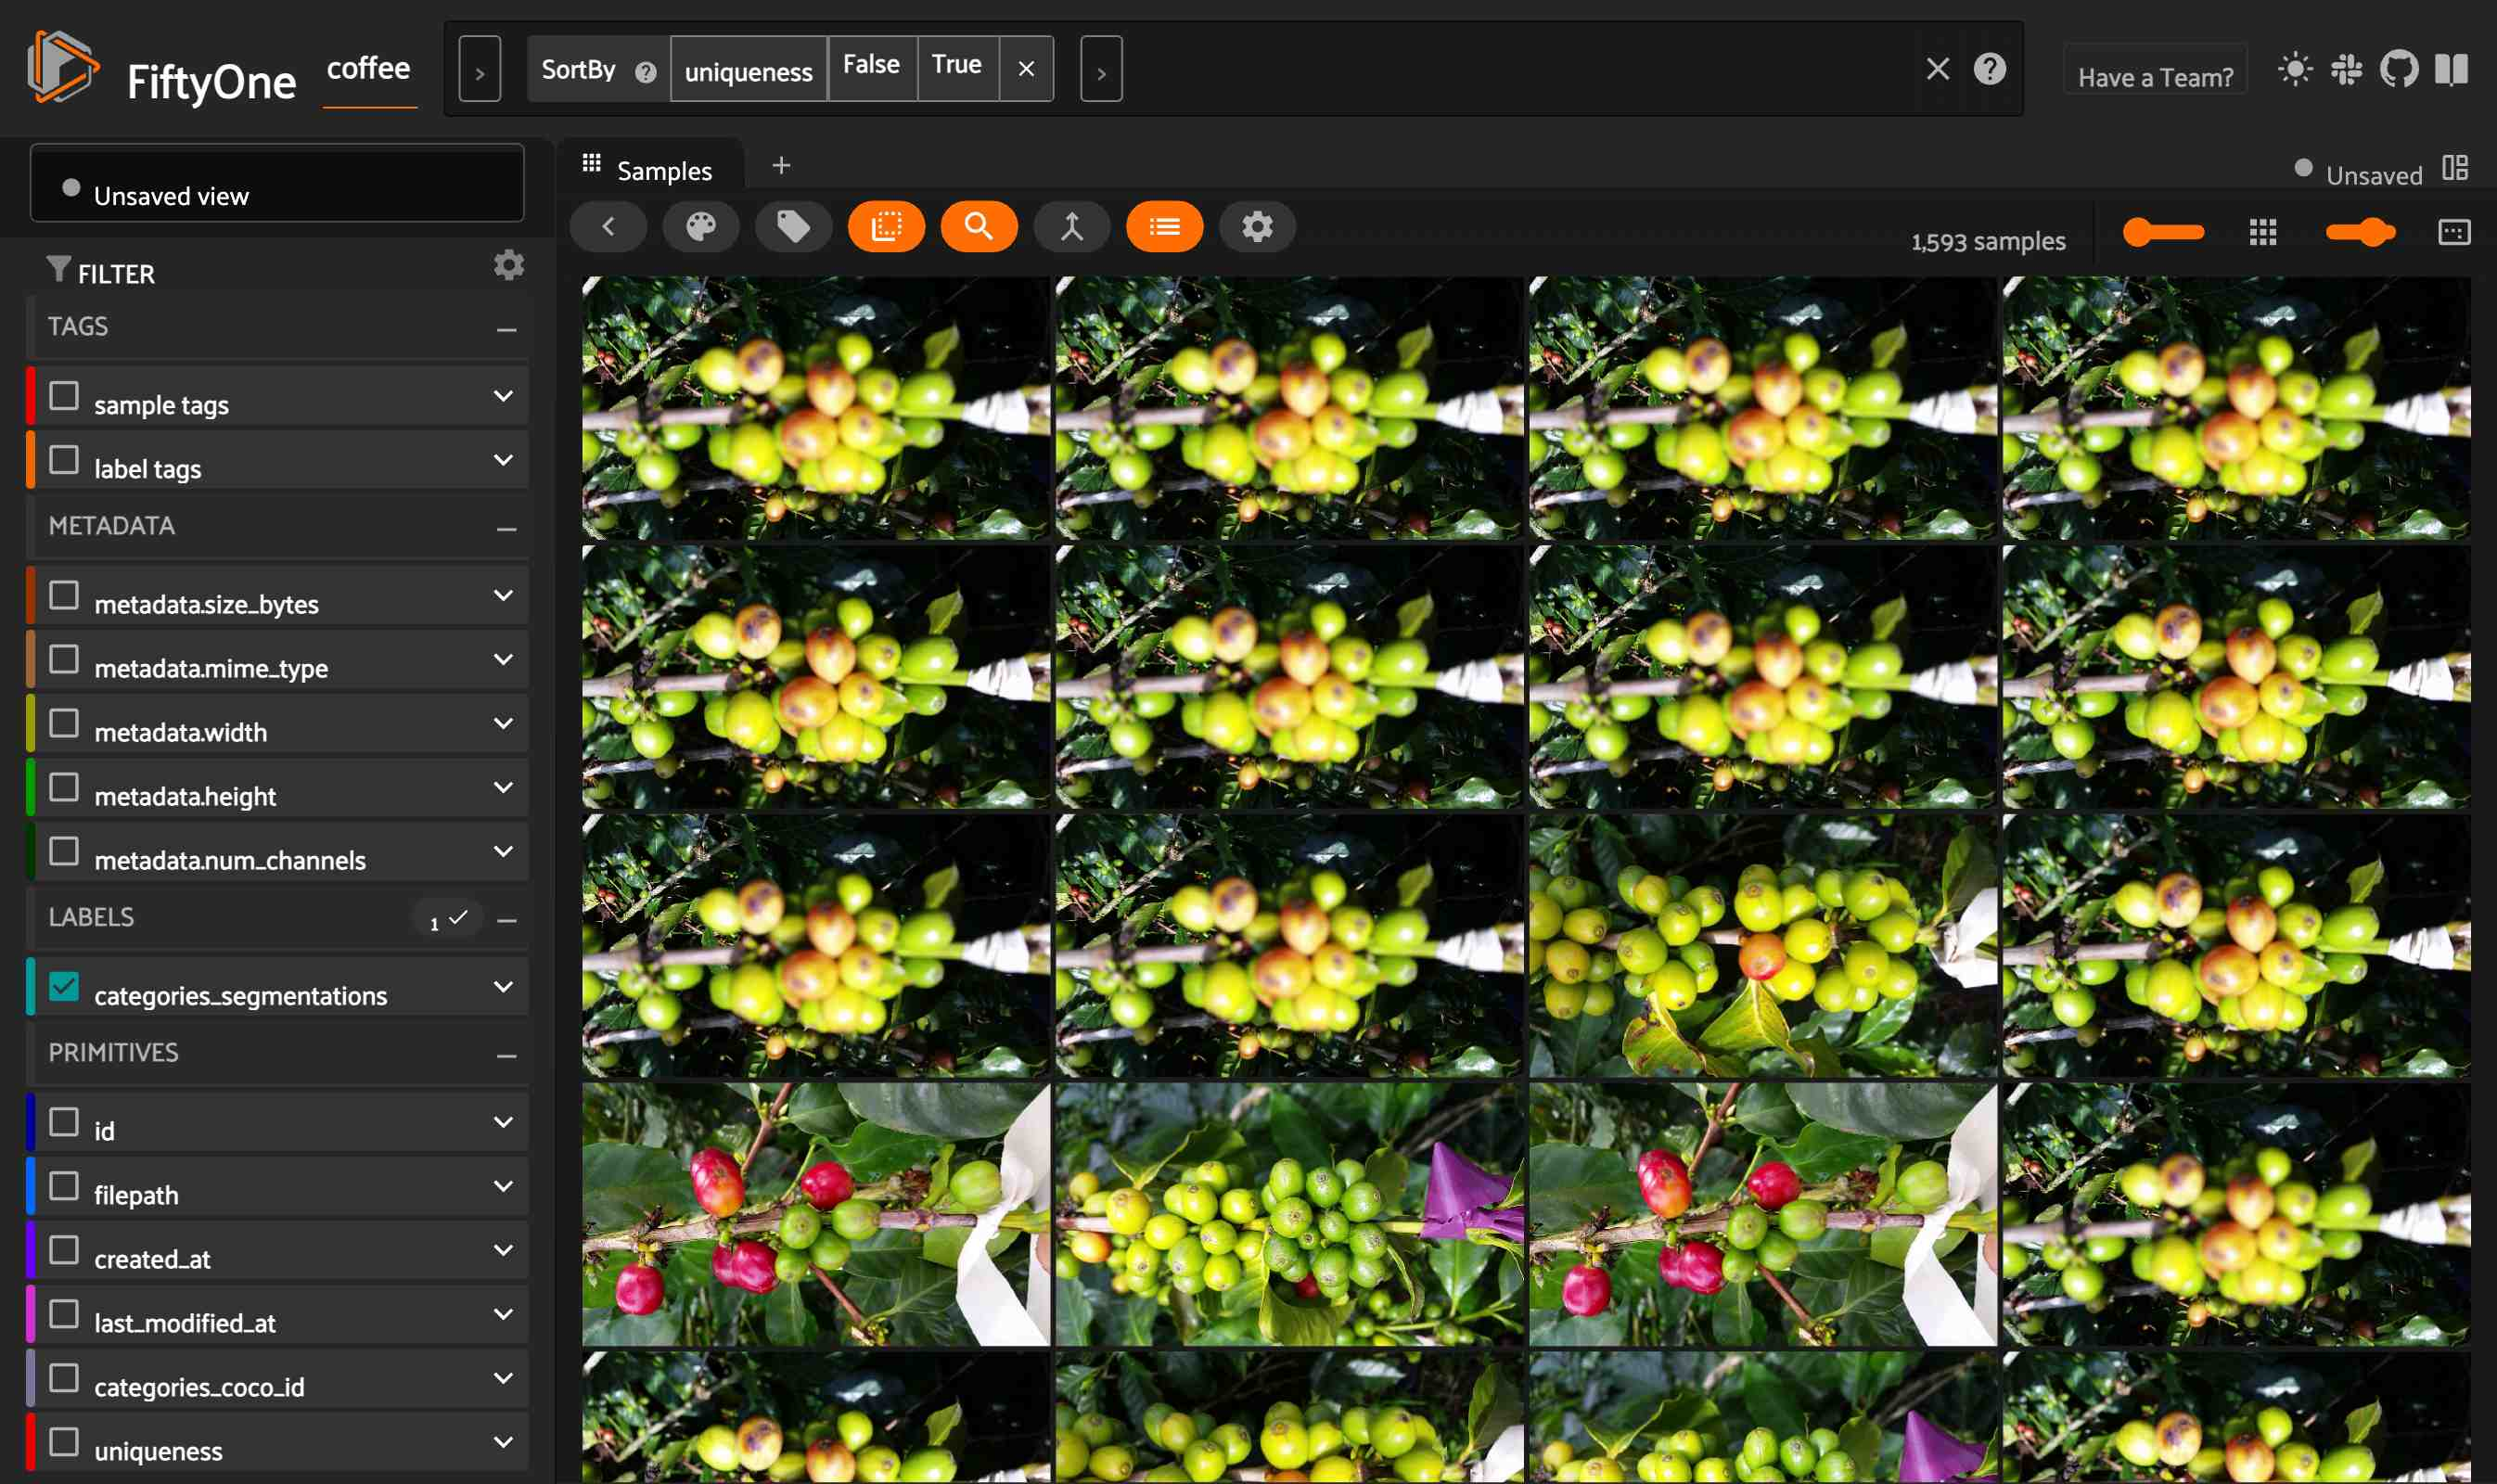

In [ ]:
# Explore the least unique samples
session.view = dataset.sort_by("uniqueness")

## Embedding methods

The `embeddings` and `model` parameters of `compute_visualization()` support a variety of ways to generate embeddings for your data:

- Provide nothing, in which case a default general purpose model is used to embed your data
- Provide a Model instance or the name of any model from the Model Zoo that supports embeddings
- Provide your own precomputed embeddings in array form
- Provide the name of a VectorField or ArrayField of your dataset in which precomputed embeddings are stored

In [ ]:
# Image embeddings
fob.compute_visualization(dataset, brain_key="img_viz")

Computing embeddings...
 100% |███████████████| 1593/1593 [7.1m elapsed, 0s remaining, 4.0 samples/s]      
Generating visualization...
UMAP( verbose=True)
Mon Dec 16 17:33:53 2024 Construct fuzzy simplicial set


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


Mon Dec 16 17:33:54 2024 Finding Nearest Neighbors
Mon Dec 16 17:33:55 2024 Finished Nearest Neighbor Search
Mon Dec 16 17:33:56 2024 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
Mon Dec 16 17:33:57 2024 Finished embedding



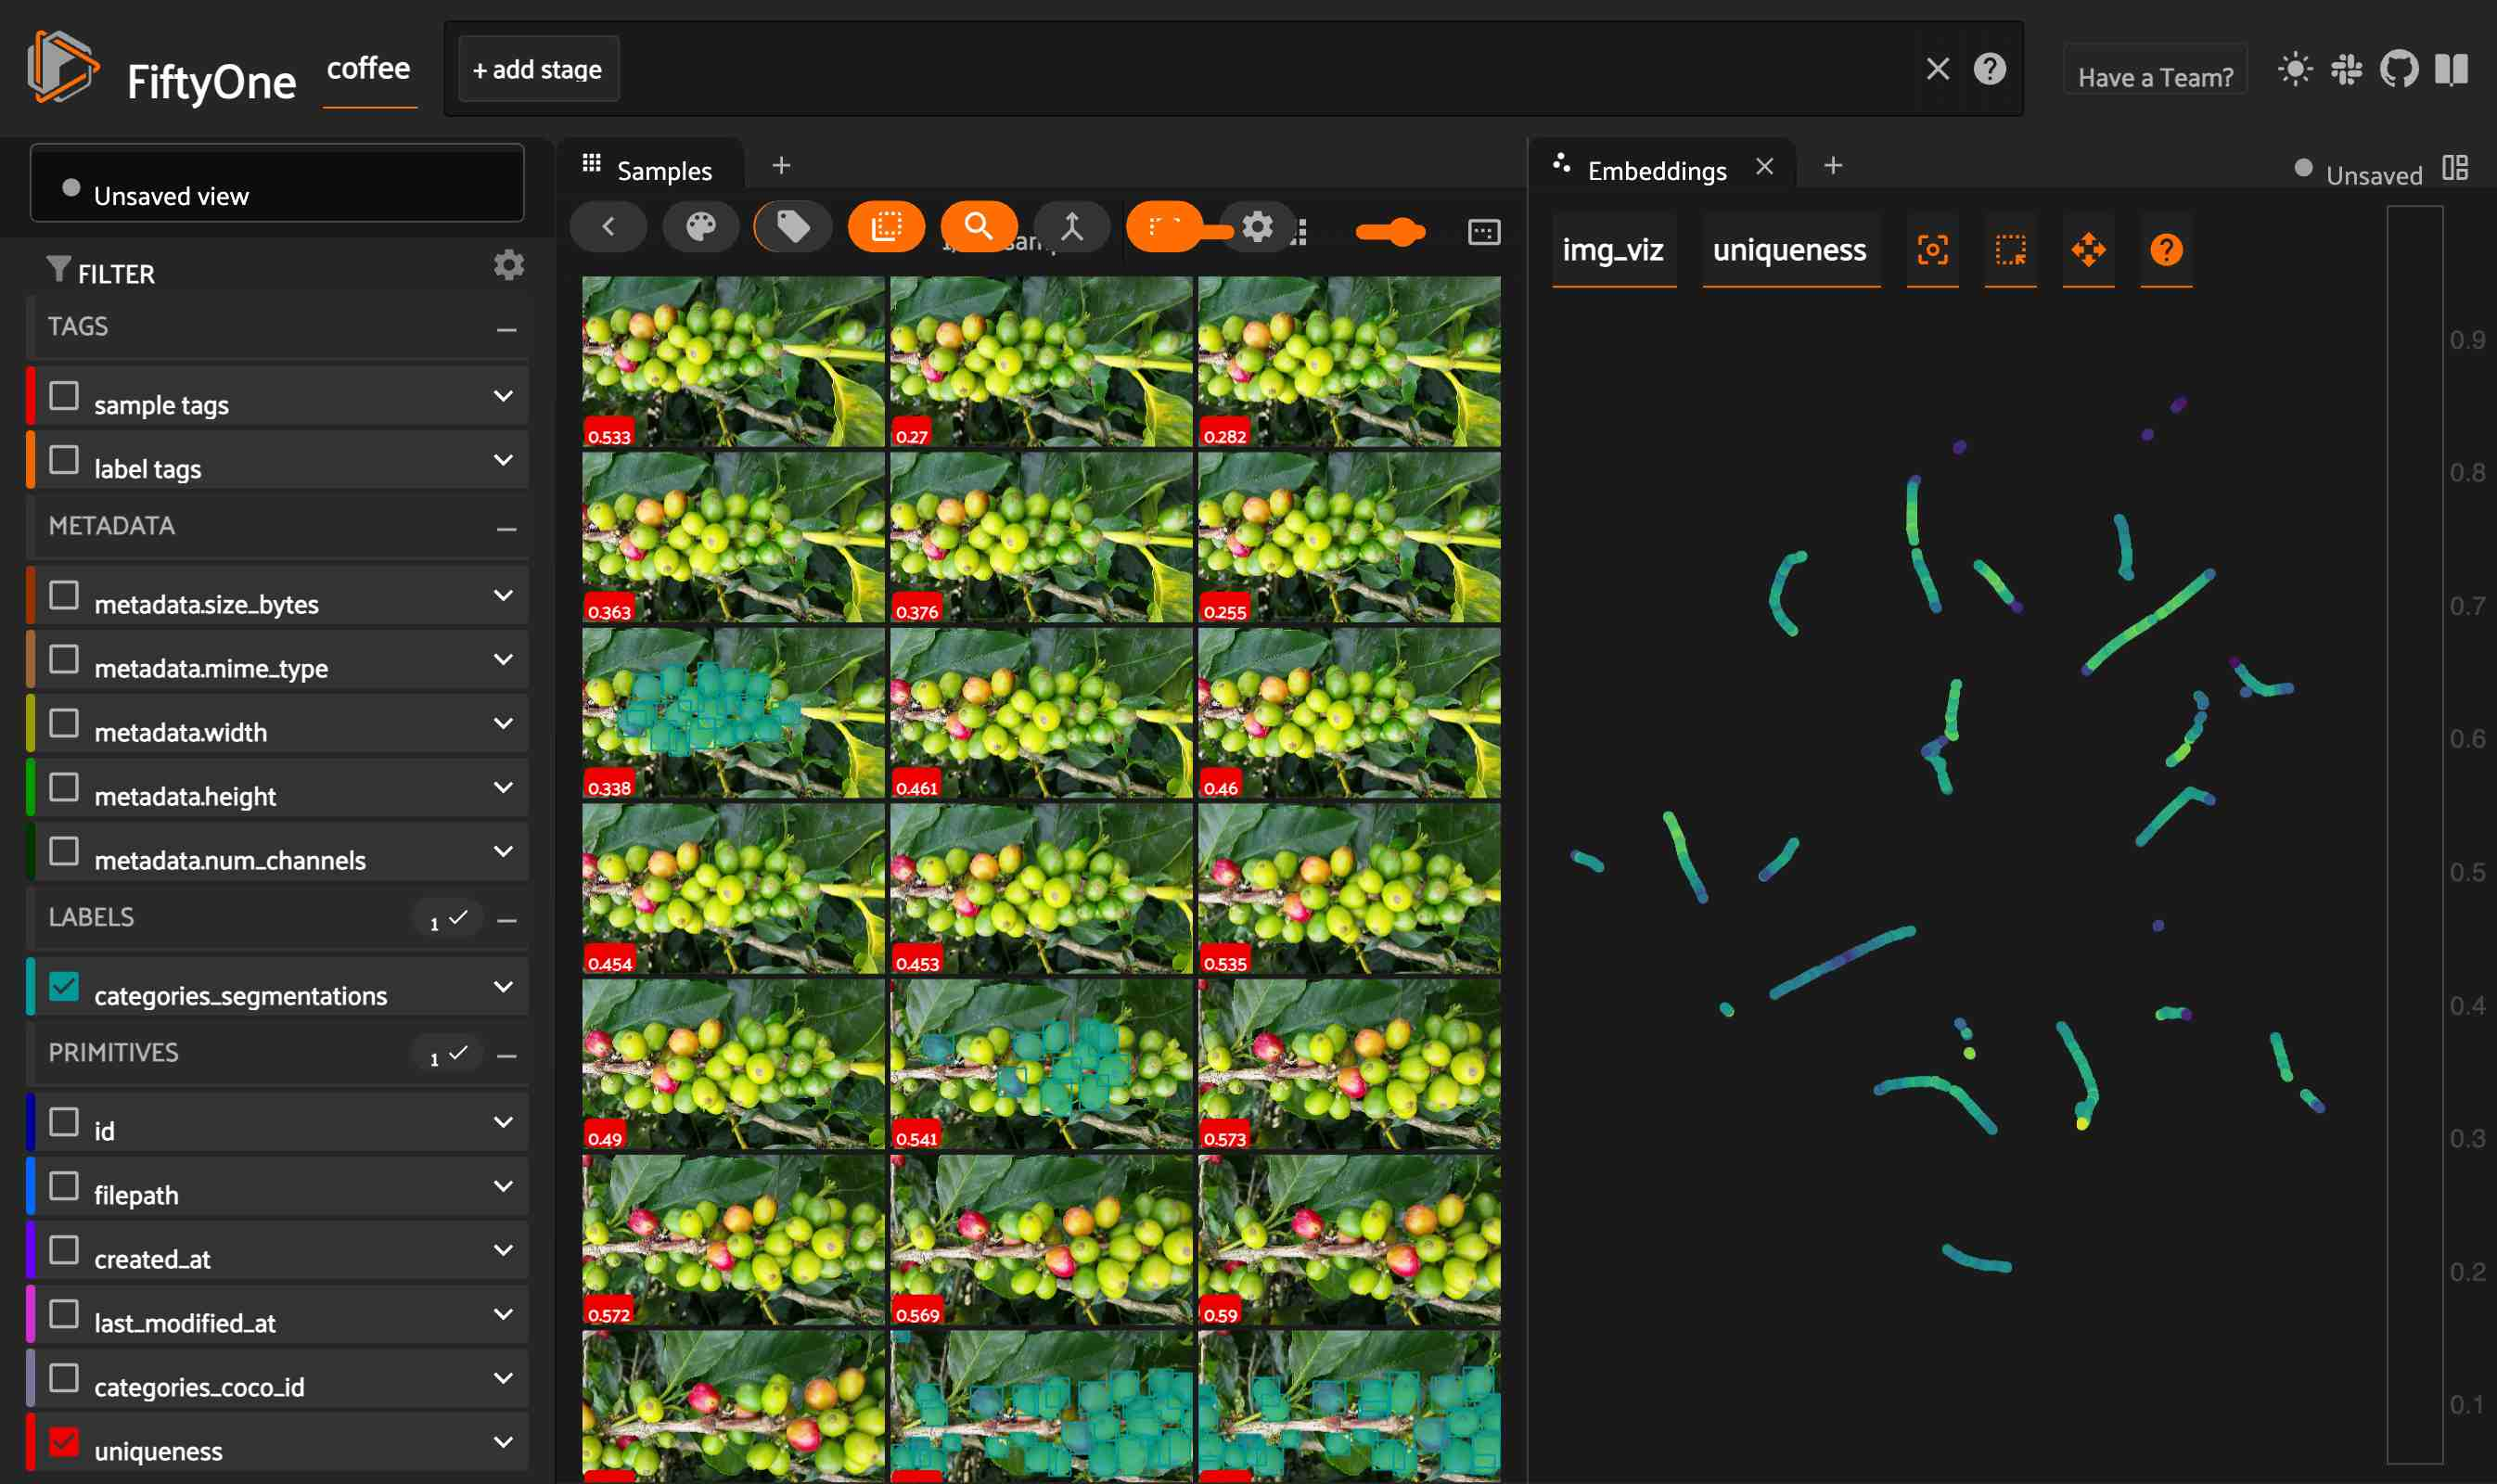

In [ ]:
session = fo.launch_app(dataset)

In [ ]:
# Index images by similarity
fob.compute_similarity(
    dataset,
    model="clip-vit-base32-torch",
    brain_key="img_sim",
)

Computing embeddings...
 100% |███████████████| 1593/1593 [1.1m elapsed, 0s remaining, 25.2 samples/s]      


In [ ]:
session = fo.launch_app(dataset)